模型可视化

In [78]:

import tensorflow as tf
from tensorflow import keras
from keras import models
from keras.preprocessing import image
import numpy as np
import os

img_path=r"C:\Users\bxzyz\Desktop\doc\ocr\data\orc-data\annotations\charactor-008"
img_name=r"charactor-008_00223.bmp"

img_path=r"C:\Users\bxzyz\Desktop\doc\ocr\data\orc-data\annotations\charactor-009"
img_name=r"charactor-009_00054.bmp"
imgpath=os.path.join(img_path,img_name)


In [79]:
model = keras.models.load_model('D:\mydoc\ML\ocr2_IC_model_all.h5')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 73, 33, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 34, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 17, 7, 64)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 6, 128)        32896     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 3, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3072)             

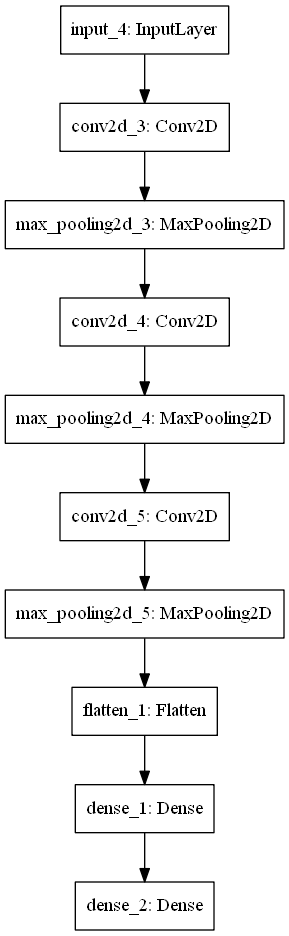

In [80]:
from tensorflow.keras.utils import plot_model
plot_model(model,to_file="E:\imagedata\model.png")

In [81]:
img=image.load_img(imgpath,target_size=(75,45))
img_tensor=image.img_to_array(img)
img_tensor=np.expand_dims(img_tensor,axis=0)
print(img_tensor.shape)

(1, 75, 45, 3)


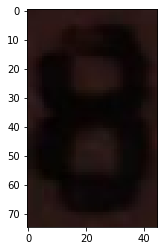

In [82]:
import matplotlib.pyplot as plt
plt.imshow(np.array(img_tensor[0],np.uint8))
plt.show()

In [83]:
from keras import models

layer_outputs=[layer.output for layer in model.layers[:4]]#提取前4层网络
activation_model=tf.keras.models.Model(inputs=model.input,outputs=layer_outputs)
activations=activation_model.predict(img_tensor)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [84]:
model.input

<tf.Tensor 'input_4_2:0' shape=(None, 75, 35, 3) dtype=float32>

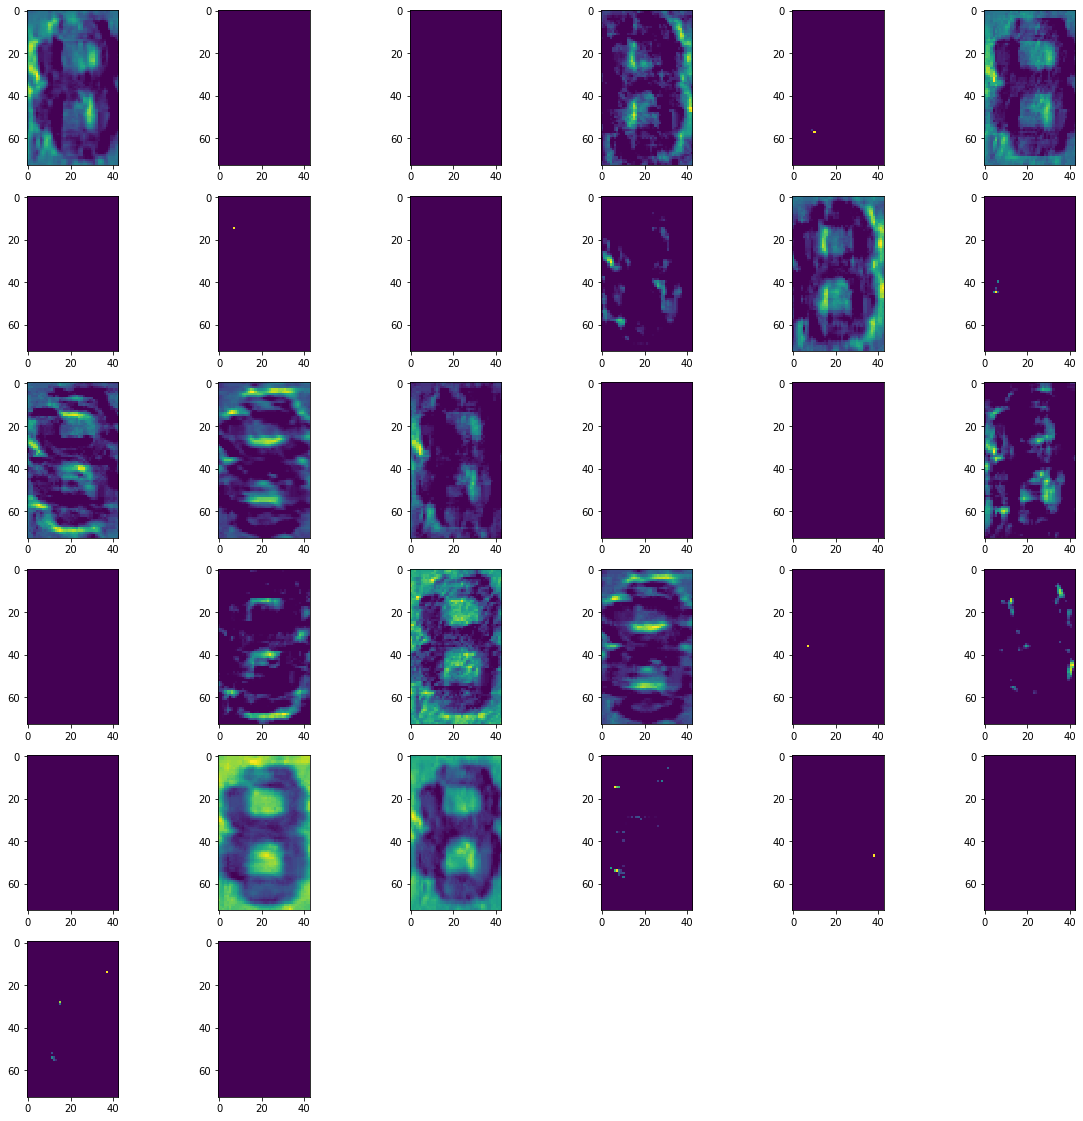

In [85]:
#
first_layer_activation=activations[0]
plt.figure(figsize=(20, 20))
for i in range(32):
    plt.subplot(6,6,i+1)
    plt.imshow(first_layer_activation[0,:,:,i]/255)
plt.show()

<Figure size 432x288 with 0 Axes>

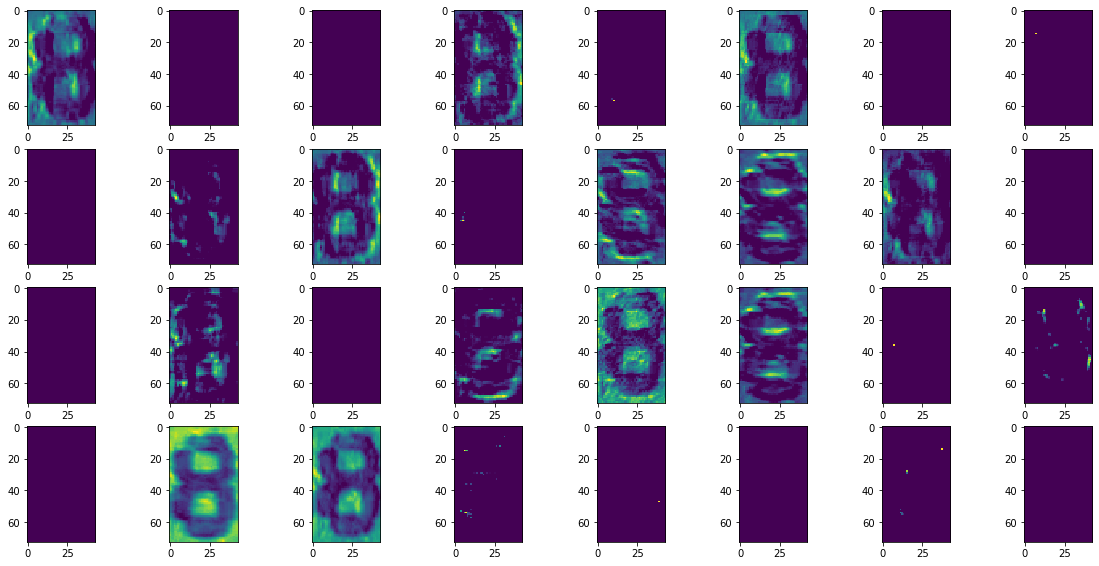

<Figure size 432x288 with 0 Axes>

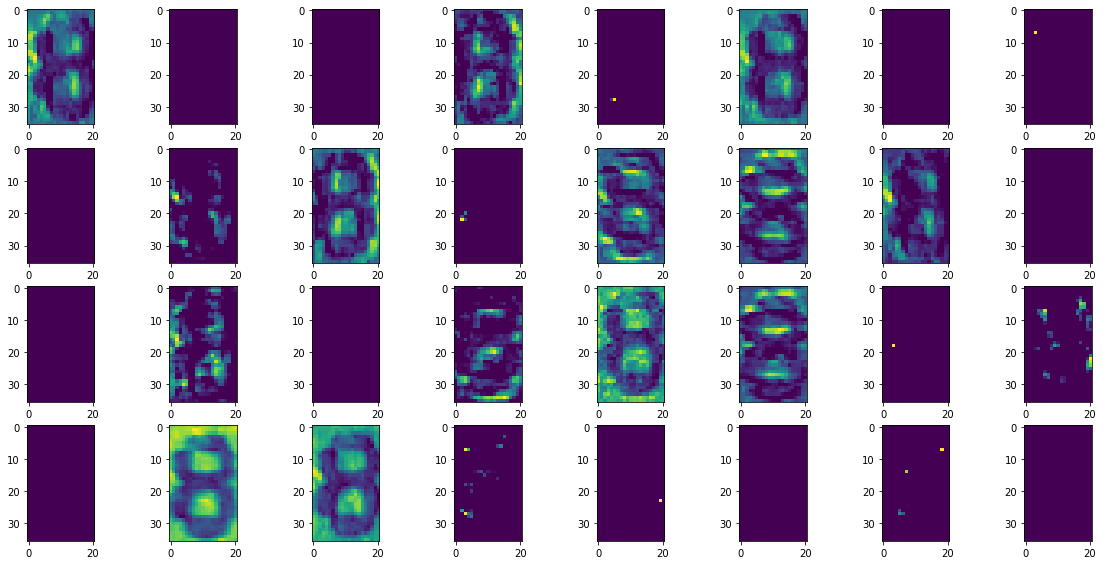

<Figure size 432x288 with 0 Axes>

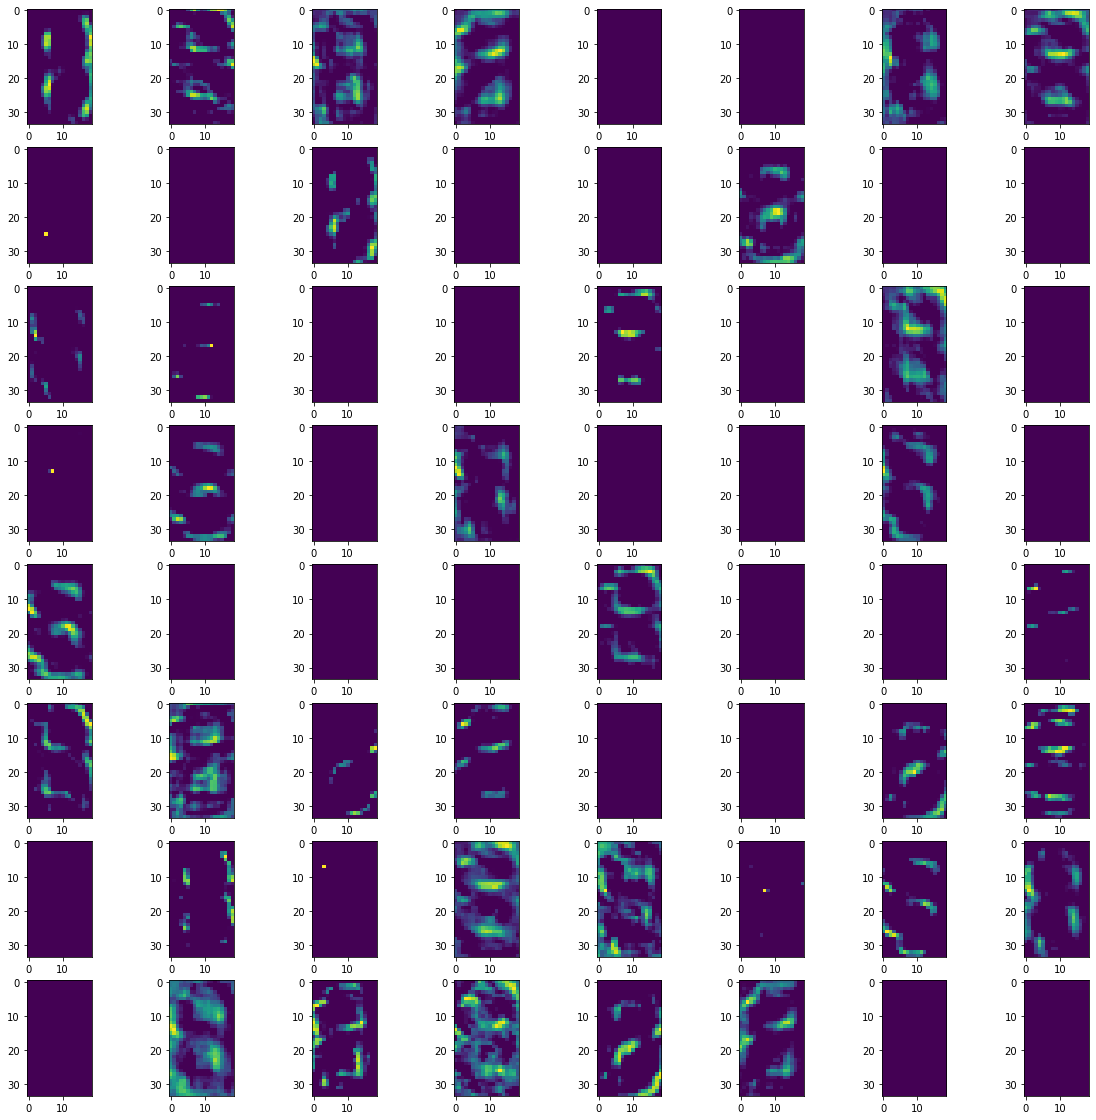

<Figure size 432x288 with 0 Axes>

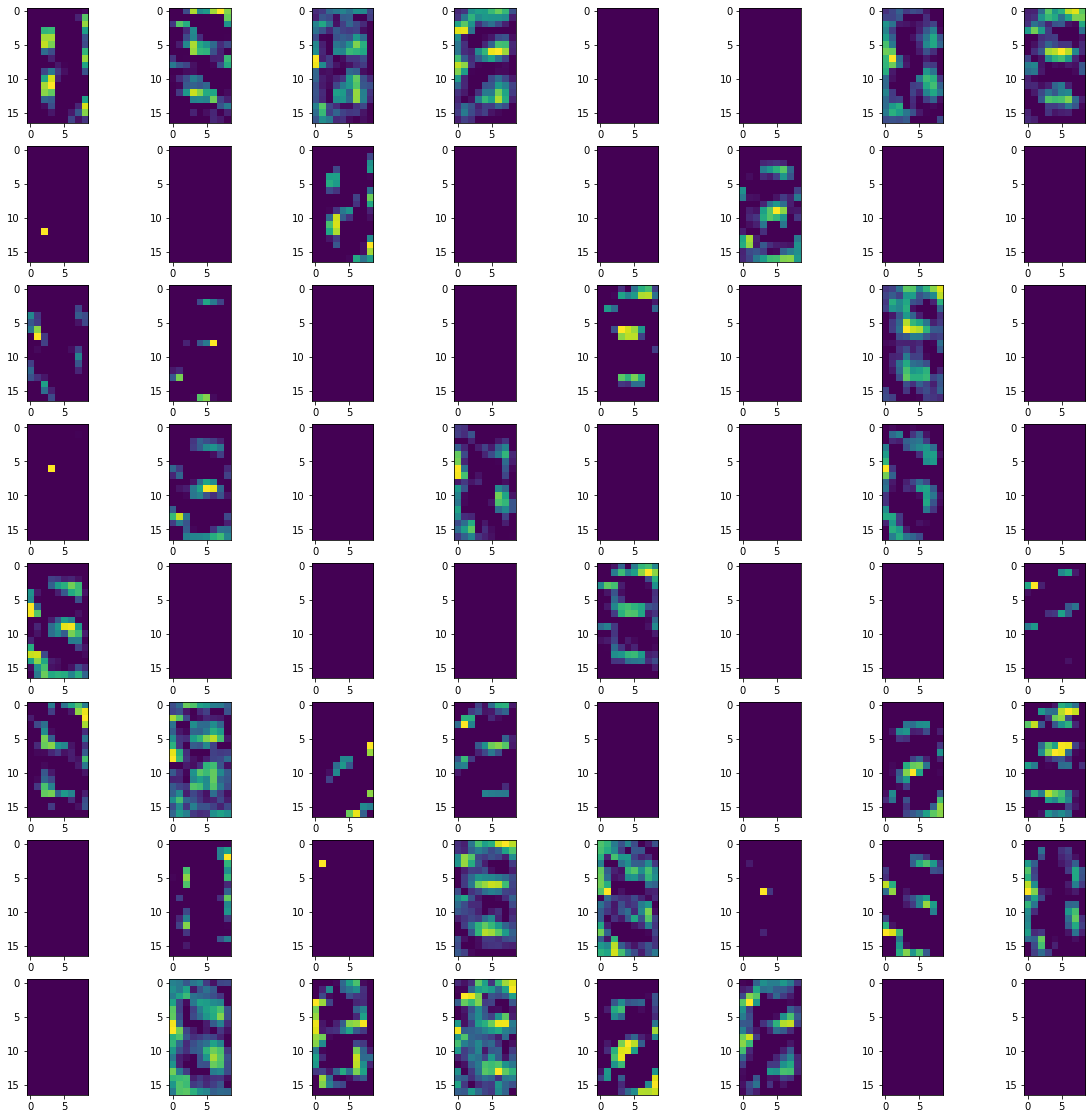

In [86]:
num=0
for layer_output in activations:
    num+=1
    plt.figure(num)
    plt.figure(figsize=(20, 20))
    for i in range(layer_output.shape[-1]):
        #layer_output的形状是(1, 73, 43, 32),最后一个表示特征通道数，feature maps
        plt.subplot(8,8,i+1)
        plt.imshow(layer_output[0,:,:,i])
    plt.show()

In [56]:
activations[0].shape

(1, 73, 43, 32)